<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/ppg_clustering_complete_2_pca_and_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
# variables declearation 

ppgData = pd.DataFrame()   # to store dataFrame from files like 1.csv
featureDf = pd.DataFrame()  # to store all features like PCA and Systolic and Diastolic of all data
ppg_pca = pd.DataFrame()    # to store all pca of all data 
ABP_sys_dia = pd.DataFrame() # to store all systolic and diastolic obtained from ABP signals of all data



In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/data/sys_dia_pca1_pca2.csv")

In [5]:
data["sys_dia"] = data["systolic"] / data['diastolic']

In [6]:
data.head()

,Unnamed: 0,systolic,diastolic,pca1,pca2,sys_dia
0,0,144.43,52.947,0.448304,0.068589,2.727822
1,1,144.43,52.947,0.108880,-0.028446,2.727822
2,2,143.36,52.752,0.464056,0.471354,2.717622
3,3,146.48,54.998,-0.089028,-0.016251,2.663370
4,4,177.11,65.060,-0.213127,0.035350,2.722256


In [8]:
data.shape

(205851, 3)

In [7]:

data = data.drop("diastolic",axis = 1)
data = data.drop("systolic",axis = 1)
data = data.drop("Unnamed: 0",axis = 1)

In [9]:

data.head()

,pca1,pca2,sys_dia
0,0.448304,0.068589,2.727822
1,0.108880,-0.028446,2.727822
2,0.464056,0.471354,2.717622
3,-0.089028,-0.016251,2.663370
4,-0.213127,0.035350,2.722256


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205851 entries, 0 to 205850
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   pca1     205851 non-null  float64
 1   pca2     205851 non-null  float64
 2   sys_dia  205851 non-null  float64
dtypes: float64(3)
memory usage: 4.7 MB


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


 
# initialise kmeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(data)
cluster_labels = kmeans.labels_


In [12]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [15]:
print("number of datasets of cluster 0 = ",cluster_labels[cluster_labels == 0].shape[0])
print("number of datasets of cluster 1 = ",cluster_labels[cluster_labels == 1].shape[0])
print("number of datasets of cluster 2 = ",cluster_labels[cluster_labels == 2].shape[0])
print("number of datasets of cluster 3 = ",cluster_labels[cluster_labels == 3].shape[0])
print("number of datasets of cluster 4 = ",cluster_labels[cluster_labels == 4].shape[0])
print("number of datasets of cluster 5 = ",cluster_labels[cluster_labels == 5].shape[0])


number of datasets of cluster 0 =  16603
number of datasets of cluster 1 =  15969
number of datasets of cluster 2 =  123277
number of datasets of cluster 3 =  17286
number of datasets of cluster 4 =  15885
number of datasets of cluster 5 =  16831


In [34]:
PCA_values = pd.DataFrame()
PCA_values["pca1"] = data['pca1']
PCA_values['pca2'] = data['pca2']


In [35]:
PCA_values.head()

,pca1,pca2
0,0.448304,0.068589
1,0.108880,-0.028446
2,0.464056,0.471354
3,-0.089028,-0.016251
4,-0.213127,0.035350


In [38]:
label0 = PCA_values[cluster_labels == 0]
label0

,pca1,pca2
455,-1.928102,-2.445909
456,-3.631020,-2.402302
482,-2.972059,-1.700744
485,-0.682491,-4.539847
486,-6.002697,-4.438316
...,...,...
205336,-1.794848,-6.711284
205531,-1.369701,-2.693881
205652,-4.944442,-4.538288
205691,-6.771166,-2.832290


In [39]:
label1 = PCA_values[cluster_labels == 1]
label2 = PCA_values[cluster_labels == 2]
label3 = PCA_values[cluster_labels == 3]
label4 = PCA_values[cluster_labels == 4]
label5 = PCA_values[cluster_labels == 5]

In [16]:
import sklearn

sklearn.metrics.davies_bouldin_score(data.values, cluster_labels)

0.715758743503251

In [17]:
sklearn.metrics.calinski_harabasz_score(data.values, cluster_labels)

148963.97221771648

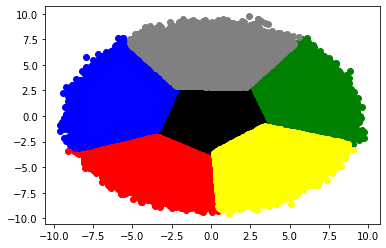

In [40]:
import matplotlib.pyplot as plt 
plt.scatter(label0.values[:,0],label0.values[:,1],color = "red")
plt.scatter(label1.values[:,0],label1.values[:,1],color = "green")
plt.scatter(label2.values[:,0],label2.values[:,1],color = "black")
plt.scatter(label3.values[:,0],label3.values[:,1],color = "blue")
plt.scatter(label4.values[:,0],label4.values[:,1],color = "yellow")
plt.scatter(label5.values[:,0],label5.values[:,1],color = "gray")
plt.show()

In [48]:
all_ppg_2_22 = pd.DataFrame()
for i in range(2,23):
  df = pd.read_csv("/content/gdrive/MyDrive/data/PPG_/"+str(i)+".csv")
  all_ppg_2_22 = pd.concat(objs = [all_ppg_2_22 , df] ,axis = 0,ignore_index = True )
  print(i)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


cluster is  5 index is  1000
cluster is  2 index is  1001
cluster is  0 index is  1002
cluster is  4 index is  1006


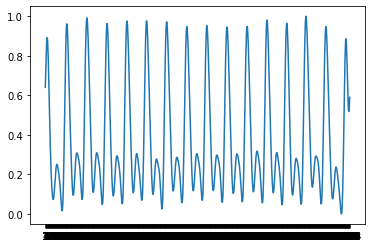

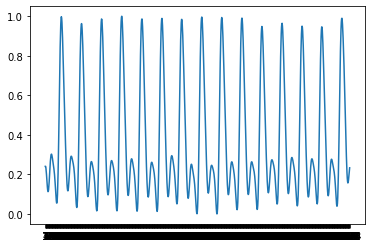

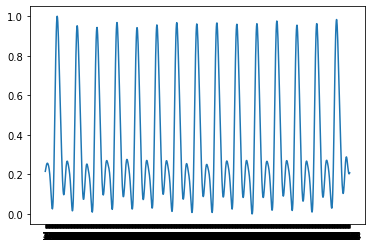

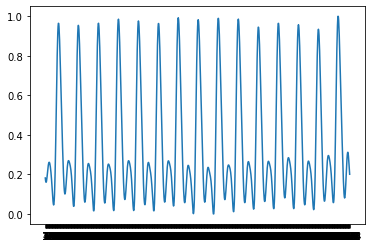

In [62]:
import matplotlib.pyplot as plt
count = 0
lst = [0,1,2,3,4,5]
for i in range(1000,1010):
  if(cluster_labels[i] in lst):
    print("cluster is ",cluster_labels[i],"index is ",i)
    plt.figure(i)
    plt.plot(all_ppg_2_22.loc[i])
    lst.remove(cluster_labels[i])


In [ ]:
all_ppg_2_22.loc[1]

In [53]:
x = [1,2,3,6,4,8,41]

In [57]:

x

[1, 2, 3, 6, 4, 41]